<a href="https://colab.research.google.com/github/Jenet-Shirely/Neural-networks-and-Deep-learning/blob/main/Education_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df=pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = (df['average_score'] >= 50).astype(int)
df.drop('average_score', axis=1, inplace=True)


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
passed,0


In [ ]:
# Step: Detect Outliers in All Numeric Columns using IQR
numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in '{col}': {len(outliers)} found")
    print(outliers[[col]].head())  # Show only the column with outliers



Outliers in 'math score': 8 found
     math score
17           18
59            0
145          22
338          24
466          26

Outliers in 'reading score': 6 found
     reading score
59              17
76              26
211             28
327             23
596             24

Outliers in 'writing score': 5 found
     writing score
59              10
76              22
327             19
596             15
980             23

Outliers in 'passed': 103 found
    passed
3        0
7        0
9        0
11       0
17       0


In [ ]:
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df = pd.get_dummies(df, columns=cat_features)

In [ ]:
X = df.drop('passed', axis=1)
y = df['passed']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=16, validation_split=0.2)


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9875 - val_loss: 0.0353
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9875 - val_loss: 0.0294
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9875 - val_loss: 0.0286
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9875 - val_loss: 0.0348
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9875 - val_loss: 0.0330
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0056 - val_accuracy: 0.9875 - val_loss: 0.0328
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9875 - val_loss: 0.0348
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9969 - loss: 0.0057 - val_accuracy: 0.9875 - val_loss

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9796 - loss: 0.1653  

Test Loss: 0.1247
Test Accuracy: 0.9800


In [ ]:
# Predict classes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.98      0.98      0.98       200



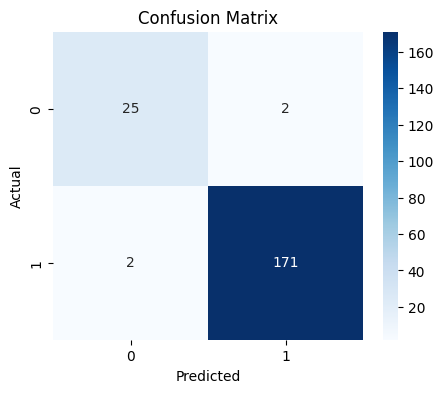

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()